# CNN实现CIFAR-10

In [26]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,Dropout,Activation,Flatten,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#加载数据集
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


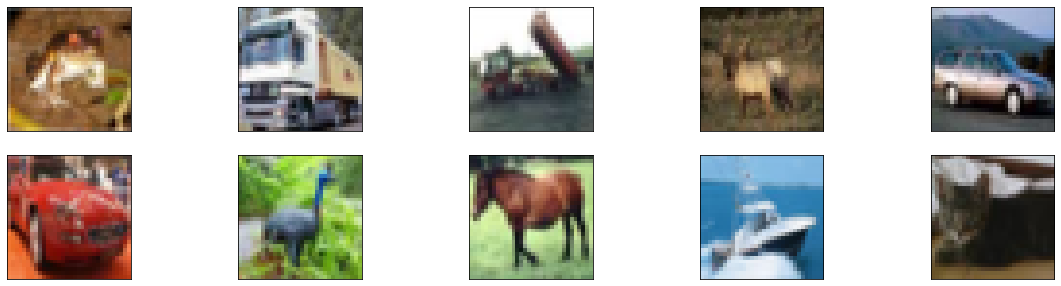

In [5]:
#测试数据
n = 10

plt.figure(figsize=(20,5))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [51]:
#将label转换为独热编码
classes = 10
y_train = to_categorical(y_train,classes)
y_test = to_categorical(y_test,classes)
#将输入归一化
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

In [53]:
class Model:
    @staticmethod
    def build(input_shape,classes):
        model = Sequential()
        #卷积层kernel_filter 32*(3,3)
        model.add(Convolution2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',input_shape=input_shape))
        model.add(Activation('relu'))
        #池化层(2,2) (2,2)
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
        model.add(Dropout(0.25))
        #Flatten
        model.add(Flatten())
        #全连接层512 softmax
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        return model

In [67]:
image_channel = 3
image_rows = 32
image_cols = 32

batch_size = 128
epochs = 10
classes = 10
verbose = 1
validation_split = 0.2

input_shape=(32,32,3)

model = Model.build(input_shape=(32,32,3),classes=classes)
print(model.layers)
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=verbose,validation_split=validation_split)
#模型评价
score = model.evaluate(x_test,y_test,verbose=verbose,batch_size=batch_size)
print('test error:',score[0])
print('test accuracy:',score[1])

#保存模型
model_json = model.to_json()
with open('./model/cifar10_model.json','w') as pf:
    pf.write(model_json)
model.save_weights('./model/cifar10_weights',overwrite=True)

[<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000255C3F8DBE0>, <tensorflow.python.keras.layers.core.Activation object at 0x00000255C3F8C4E0>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x00000255C3F8C588>, <tensorflow.python.keras.layers.core.Dropout object at 0x00000255C3F8C0B8>, <tensorflow.python.keras.layers.core.Flatten object at 0x00000255C3F8C5F8>, <tensorflow.python.keras.layers.core.Dense object at 0x000002559D2CDE10>, <tensorflow.python.keras.layers.core.Activation object at 0x000002559D2F60F0>, <tensorflow.python.keras.layers.core.Dropout object at 0x00000255C3F8DEF0>, <tensorflow.python.keras.layers.core.Dense object at 0x000002559D324828>, <tensorflow.python.keras.layers.core.Activation object at 0x000002559D2F6400>]
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 40s 990us/sample - loss: 1.7537 - acc: 0.3682 - val_loss: 1.4023 - val_acc: 0.5148
Epoch 2/10
40000/40000 [===

In [85]:
def plot_error_accuracy(history):
    plt.figure(figsize=(10,5))
    ax = plt.subplot(1,2,1)
    ax.plot(history.history['loss'],'r-s',label='train loss')
    ax.plot(history.history['val_loss'],'b-s',label='valid loss')
    plt.legend()
    ax = plt.subplot(1,2,2)
    ax.plot(history.history['acc'],'r-s',label='train acc')
    ax.plot(history.history['val_acc'],'b-s',label='valid acc')
    plt.legend()
    plt.show()

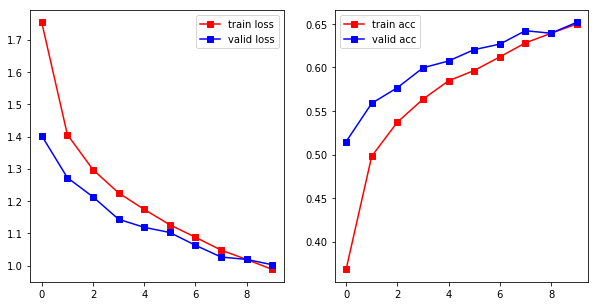

In [86]:
plot_error_accuracy(history)

In [109]:
from tensorflow.keras.models import model_from_json
#加载模型
model_architecture = model_from_json(open('./model/cifar10_model.json').read())
model_architecture.load_weights('./model/cifar10_weights')
xx = x_test[0][np.newaxis,:,:,:]
#print(model.predict_classes(x_test[0].reshape(1,32,32,3)))
print(model_architecture.predict_classes(xx))
print(y_test[0])

[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


<b>优化方案：通过增加数据和增加深度网络来优化模型</b>

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D